In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale

## Weather Data
- Only need the features

In [47]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
df_weather = pd.read_csv('/content/drive/My Drive/GW_Class/DNSC6314/Assignments/Data/DC_weather_2024.csv')

df_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"washington, dc",2024-01-01,43.0,38.9,40.8,41.8,31.4,36.4,33.3,74.7,...,0.9,1,10,2024-01-01T07:26:50,2024-01-01T16:56:30,0.68,Overcast,Cloudy skies throughout the day.,cloudy,"KDCA,72405013743,D6279,72403793728,KADW,KDAA,7..."
1,"washington, dc",2024-01-02,45.9,35.7,40.4,40.9,27.2,33.8,26.2,57.3,...,8.3,5,10,2024-01-02T07:26:58,2024-01-02T16:57:20,0.72,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,D6279,72403793728,KADW,KDAA,7..."
2,"washington, dc",2024-01-03,47.8,33.7,39.9,44.6,27.8,36.4,26.6,59.5,...,9.6,5,10,2024-01-03T07:27:04,2024-01-03T16:58:10,0.75,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,D6279,72403793728,KADW,..."
3,"washington, dc",2024-01-04,46.7,33.2,40.4,41.9,24.1,34.6,25.2,55.2,...,4.8,4,10,2024-01-04T07:27:07,2024-01-04T16:59:02,0.78,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,72403793728,KADW,KDAA,7..."
4,"washington, dc",2024-01-05,39.9,27.8,33.6,35.8,19.4,28.0,18.9,55.0,...,11.6,5,10,2024-01-05T07:27:09,2024-01-05T16:59:55,0.81,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,72403793728,D6279,KADW,..."


In [49]:
# Date time format
df_weather['datetime'] = pd.to_datetime(df_weather['datetime']).dt.date

# Drop unnecessary variables and categorical variables
df_weather=df_weather.drop(columns=['datetime','icon','name', 'stations','snowdepth','description','sunrise','sunset','conditions','severerisk','preciptype','windgust'])

df_weather.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,snow,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase
0,43.0,38.9,40.8,41.8,31.4,36.4,33.3,74.7,0.0,0,...,0.0,13.6,327.2,1017.6,90.3,9.9,11.7,0.9,1,0.68
1,45.9,35.7,40.4,40.9,27.2,33.8,26.2,57.3,0.0,0,...,0.0,18.1,327.7,1020.6,47.5,9.9,96.5,8.3,5,0.72
2,47.8,33.7,39.9,44.6,27.8,36.4,26.6,59.5,0.0,0,...,0.0,8.8,210.9,1018.1,68.7,9.9,113.2,9.6,5,0.75
3,46.7,33.2,40.4,41.9,24.1,34.6,25.2,55.2,0.0,0,...,0.0,21.8,329.2,1018.9,68.5,9.9,54.2,4.8,4,0.78
4,39.9,27.8,33.6,35.8,19.4,28.0,18.9,55.0,0.0,0,...,0.0,13.2,303.8,1026.9,44.5,9.9,132.6,11.6,5,0.81


## Correlation Pair Plot

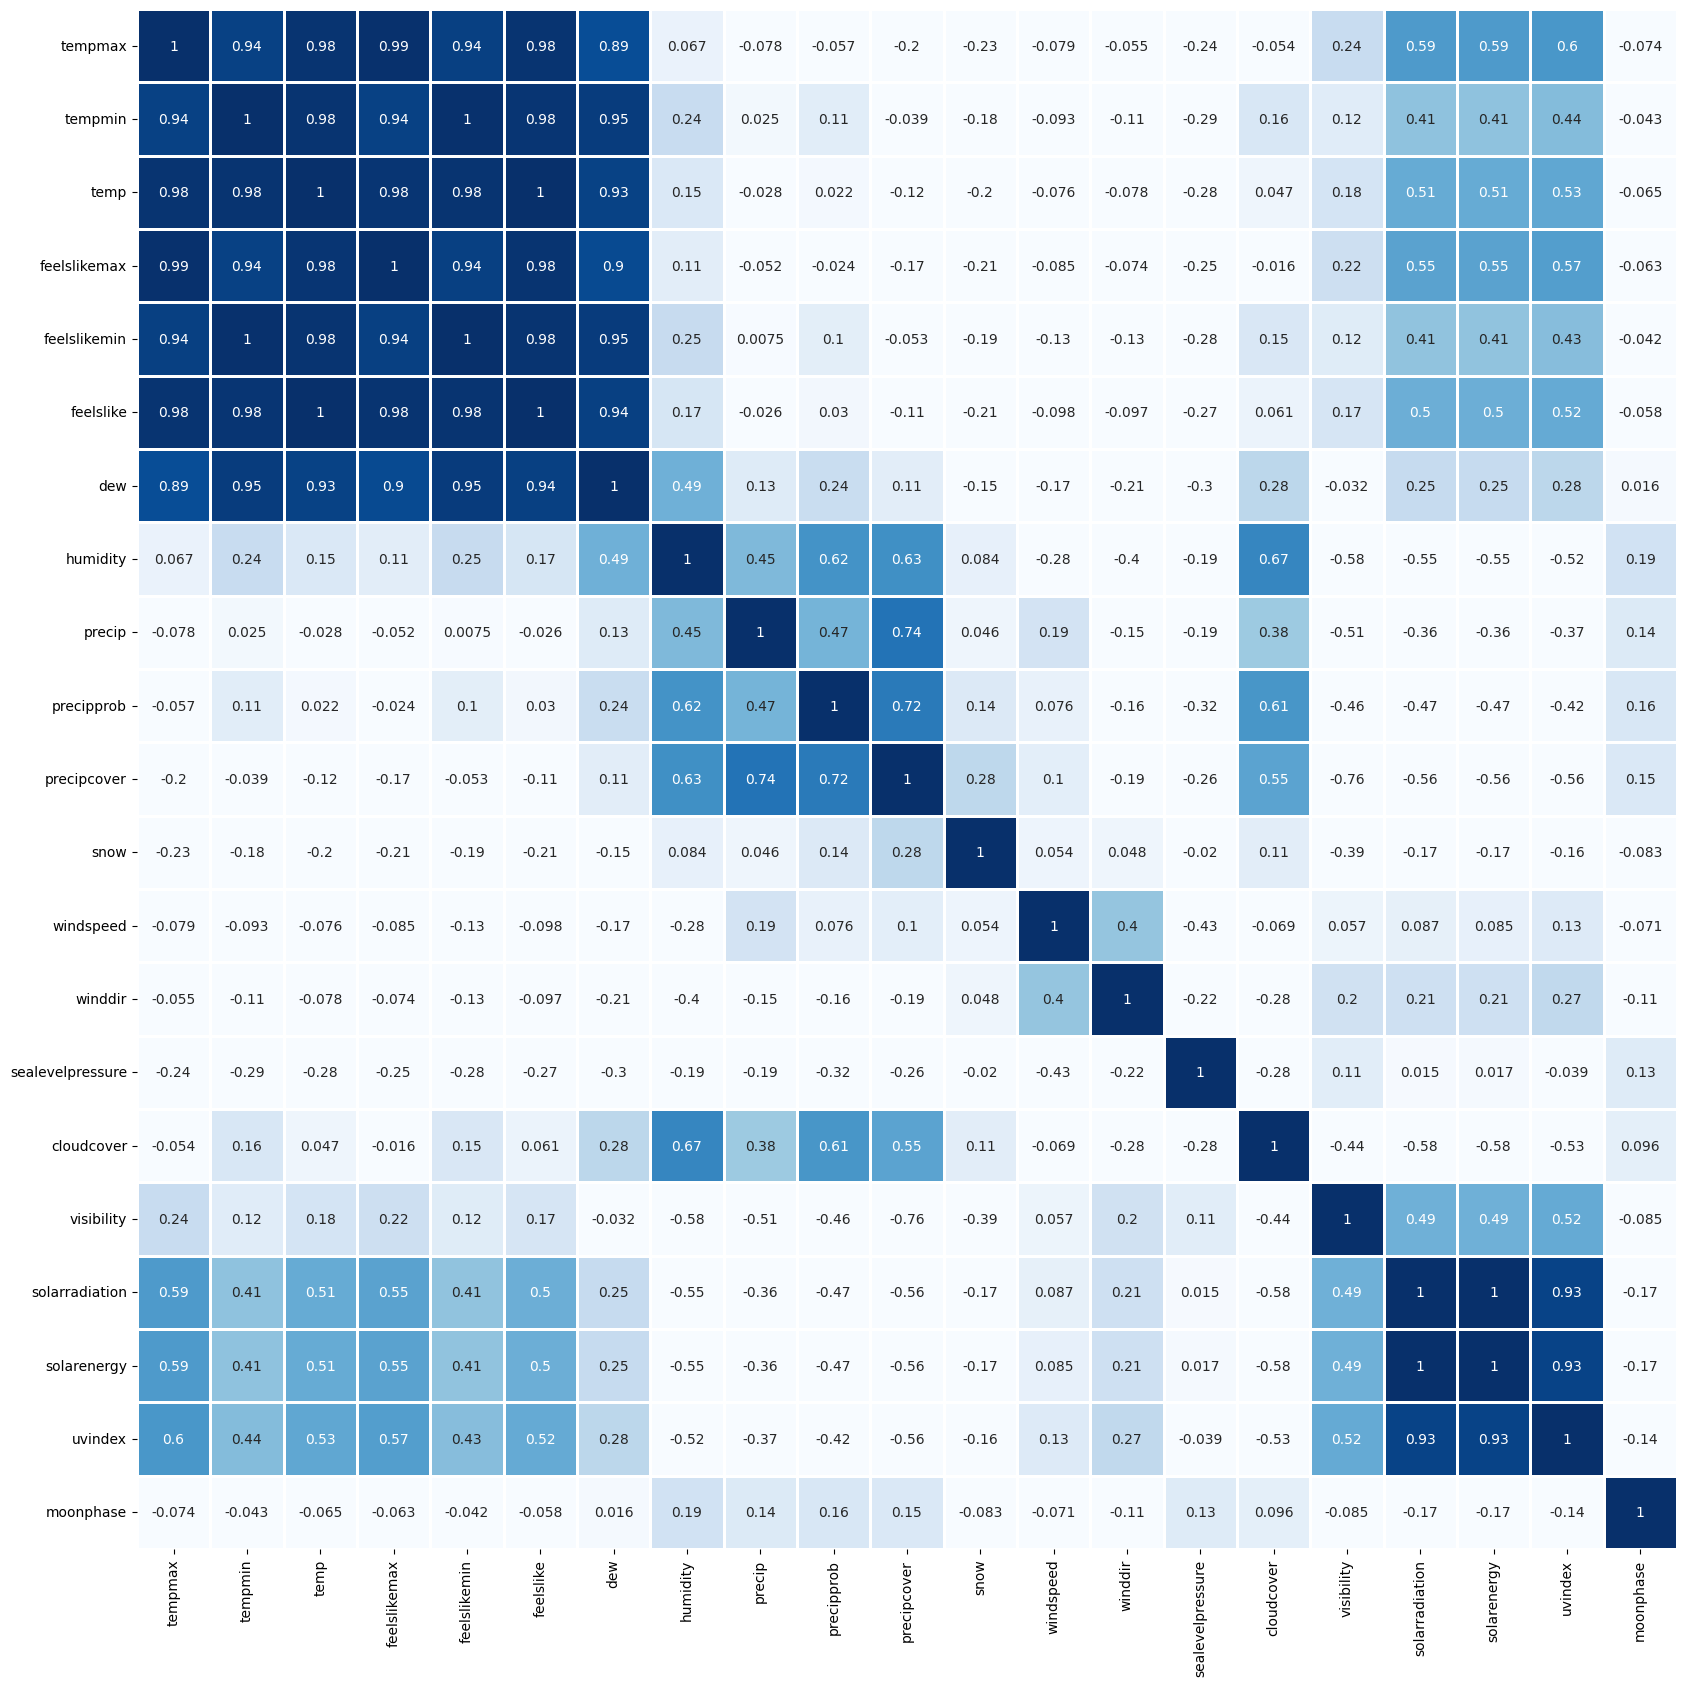

In [50]:
fig, ax = plt.subplots(figsize=(20,20))

corr = df_weather.corr()

ax1 = sns.heatmap(corr, annot=True, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues', ax=ax)
plt.show()

## Reduce number of features by PCA

In [51]:
# dimensiom = number of features
p=df_weather.shape[1]
p

21

In [52]:
from sklearn.preprocessing import StandardScaler
df_weather_scaled = StandardScaler().fit_transform(df_weather)

In [54]:
# PCA function in sklearn
from sklearn.decomposition import PCA

pca = PCA(n_components=p)
PCs = pca.fit_transform(df_weather_scaled)

print('Amount of variance explained by PCs:', pca.explained_variance_)

Amount of variance explained by PCs: [8.09378011e+00 5.41774663e+00 1.94507278e+00 1.14159279e+00
 1.02955582e+00 8.03794046e-01 5.74728927e-01 4.72799377e-01
 4.44008886e-01 3.30133578e-01 3.00234135e-01 2.16156445e-01
 1.12646255e-01 8.42276913e-02 7.16860844e-02 8.10726475e-03
 5.35766005e-03 4.53145143e-03 9.09677347e-04 3.12646814e-04
 1.51990086e-04]


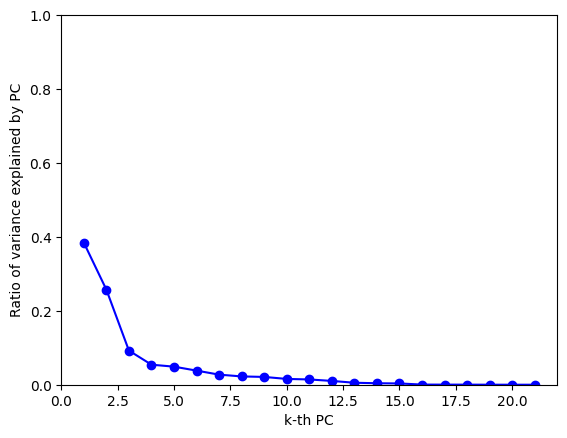

In [55]:
# visualize the ratio of variance explained by PCs
plt.xlabel("k-th PC")
plt.ylabel(r'Ratio of variance explained by PC')
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0,xmax=p+1)
plt.plot(range(1,p+1),pca.explained_variance_ratio_, linestyle='-', marker='o', color='blue')
plt.show()

In [56]:
# get the top 2 PCs
PC1=pca.components_[0,].reshape(p,1)
PC2=pca.components_[1,].reshape(p,1)

In [57]:
print("The loading of PC1 from sklearn:", PC1.T) # show the transpose of the loading vector
print("The loading of PC2 from sklearn:", PC2.T)

The loading of PC1 from sklearn: [[ 0.33968874  0.31463328  0.33294198  0.33493711  0.31538846  0.33097082
   0.28081585 -0.03644425 -0.07728732 -0.06980738 -0.13130631 -0.09660216
  -0.01850239  0.00843495 -0.07036729 -0.06769511  0.13887044  0.2599526
   0.26012847  0.26390915 -0.04294574]]
The loading of PC2 from sklearn: [[ 0.08811451  0.17457751  0.13129431  0.10534452  0.17344741  0.13777844
   0.24915117  0.37869149  0.26174464  0.32171182  0.33223906  0.04943632
  -0.05227672 -0.16580873 -0.14958031  0.33334413 -0.27104214 -0.2291091
  -0.22899318 -0.21512211  0.07515801]]


## Represent the data in 2-dimension (i.e., using two PCs)
- We treat each PC as a newly conctructed feature

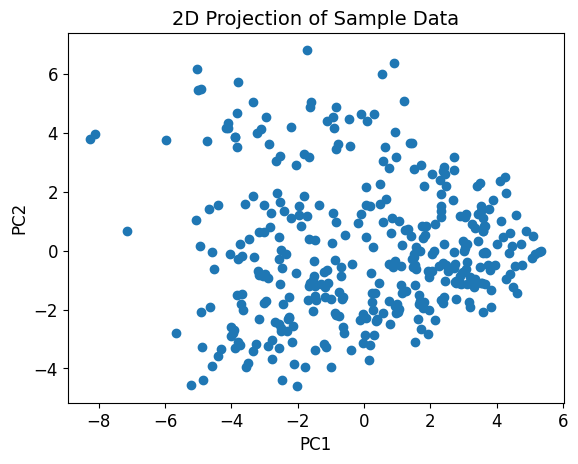

In [59]:
# project data into lower-dimensional space by the top 2 PCs
pca = PCA(n_components=2)
PCs = pca.fit_transform(df_weather_scaled)

weather_LD = pd.DataFrame(data = PCs, columns = ['PC1', 'PC2'])

# show the data points
plt.scatter(weather_LD['PC1'], weather_LD['PC2'])
plt.title('2D Projection of Sample Data', fontsize=14)
plt.xlabel('PC1',  fontsize=12)
plt.ylabel('PC2',  fontsize=12)
plt.tick_params(labelsize=12)
plt.show()

## Reduce dimensions by feature type

In [60]:
#dimentionality reduction: PCA
def dim_red(dataframe,lists,columnname):
    #extract the columns
    datagroup=dataframe.filter(lists)
    #normalize the data
    from sklearn.preprocessing import StandardScaler
    data_norm = StandardScaler().fit_transform(datagroup)
    #feature extraction with PCA
    from sklearn.decomposition import PCA
    pca = PCA(n_components=1)
    PCs = pca.fit_transform(datagroup)

    df_pca = pd.DataFrame(data = PCs, columns = [columnname])
    return df_pca

In [61]:
temp_group=['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike','dew']
precip_group=['humidity','precip', 'precipprob', 'precipcover']
vis_group=['visibility','solarradiation', 'solarenergy', 'uvindex']
wind_group=['windgust','windspeed', 'winddir']

In [62]:
temp_PC1=dim_red(df_weather,temp_group,'temp_PC1')
precip_PC1=dim_red(df_weather,precip_group,'precip_PC1')
vis_PC1=dim_red(df_weather,vis_group,'vis_PC1')
wind_PC1=dim_red(df_weather,wind_group,'wind_PC1')

## Weather data after dimension reduction

In [ ]:
PCA_df = pd.concat([temp_PC1,precip_PC1,vis_PC1,wind_PC1],axis = 1)
PCA_df

,temp_PC1,precip_PC1,vis_PC1,wind_PC1
0,-56.151347,-34.411208,-121.776887,132.652651
1,-61.989626,-37.525305,-36.566927,133.238001
2,-59.178531,-37.131569,-19.828728,16.282480
3,-63.420760,-37.901145,-79.018326,134.807981
4,-79.486599,-37.936939,-0.342131,109.249275
...,...,...,...,...
361,-51.800773,-36.361993,-46.938999,-91.443674
362,-34.938864,81.694204,-116.390956,-9.174950
363,-3.531072,69.922141,-74.264837,-19.985000
364,-19.198437,-37.972733,-23.529604,49.091152


## We can then run regression with the consolidated features (i.e., PCs)